In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image

import tensorflow as tf

with tf.device('/gpu:1'):
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

Using TensorFlow backend.


# Load Data

In [2]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [4]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  IM-0005-0001.jpeg
pneumonia picture title: person100_bacteria_478.jpeg


Text(0.5, 1.0, 'Pneumonia')

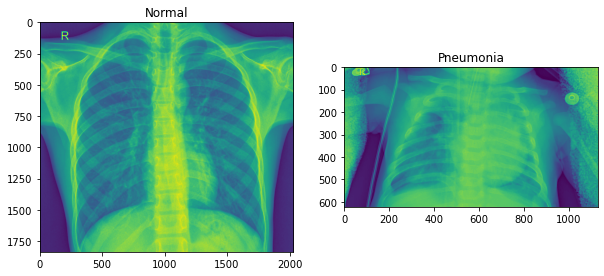

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [6]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [7]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [8]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 50)

Epoch 1/50
163/163 [==============================] - 57s 351ms/step - loss: 0.4980 - tp: 3940.0000 - fp: 1311.0000 - tn: 3905.0000 - fn: 1276.0000 - accuracy: 0.7520 - precision: 0.7503 - recall: 0.7554 - auc: 0.8394 - val_loss: 0.6130 - val_tp: 228.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 76.0000 - val_accuracy: 0.6875 - val_precision: 0.6667 - val_recall: 0.7500 - val_auc: 0.7539
Epoch 2/50
163/163 [==============================] - 51s 310ms/step - loss: 0.3555 - tp: 4474.0000 - fp: 844.0000 - tn: 4372.0000 - fn: 742.0000 - accuracy: 0.8480 - precision: 0.8413 - recall: 0.8577 - auc: 0.9215 - val_loss: 0.6035 - val_tp: 209.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 95.0000 - val_accuracy: 0.7500 - val_precision: 0.7857 - val_recall: 0.6875 - val_auc: 0.7988
Epoch 3/50
163/163 [==============================] - 51s 312ms/step - loss: 0.3267 - tp: 4554.0000 - fp: 687.0000 - tn: 4529.0000 - fn: 662.0000 - accuracy: 0.8707 - precision: 0.8689 - recall: 0.8731 - auc

Epoch 22/50
163/163 [==============================] - 51s 314ms/step - loss: 0.1627 - tp: 4903.0000 - fp: 310.0000 - tn: 4906.0000 - fn: 313.0000 - accuracy: 0.9403 - precision: 0.9405 - recall: 0.9400 - auc: 0.9832 - val_loss: 0.3464 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9375
Epoch 23/50
163/163 [==============================] - 51s 312ms/step - loss: 0.1612 - tp: 4896.0000 - fp: 327.0000 - tn: 4889.0000 - fn: 320.0000 - accuracy: 0.9380 - precision: 0.9374 - recall: 0.9387 - auc: 0.9836 - val_loss: 0.4280 - val_tp: 209.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 95.0000 - val_accuracy: 0.7188 - val_precision: 0.7333 - val_recall: 0.6875 - val_auc: 0.8672
Epoch 24/50
163/163 [==============================] - 53s 326ms/step - loss: 0.1526 - tp: 4894.0000 - fp: 309.0000 - tn: 4907.0000 - fn: 322.0000 - accuracy: 0.9395 - precision: 0.9406 - recall: 0.9383 - auc

Epoch 43/50
163/163 [==============================] - 51s 313ms/step - loss: 0.1169 - tp: 4993.0000 - fp: 223.0000 - tn: 4993.0000 - fn: 223.0000 - accuracy: 0.9572 - precision: 0.9572 - recall: 0.9572 - auc: 0.9908 - val_loss: 0.3227 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9492
Epoch 44/50
163/163 [==============================] - 52s 317ms/step - loss: 0.1336 - tp: 4969.0000 - fp: 255.0000 - tn: 4961.0000 - fn: 247.0000 - accuracy: 0.9519 - precision: 0.9512 - recall: 0.9526 - auc: 0.9883 - val_loss: 0.4528 - val_tp: 228.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 76.0000 - val_accuracy: 0.7188 - val_precision: 0.7059 - val_recall: 0.7500 - val_auc: 0.8574
Epoch 45/50
163/163 [==============================] - 53s 327ms/step - loss: 0.1305 - tp: 4962.0000 - fp: 255.0000 - tn: 4961.0000 - fn: 254.0000 - accuracy: 0.9512 - precision: 0.9511 - recall: 0.9513 - auc

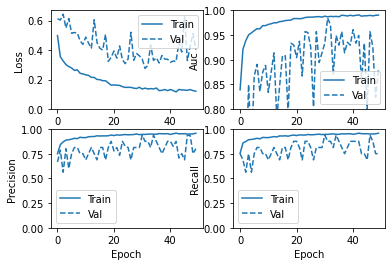

In [9]:
cnn.plot_history()

In [10]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.94      0.81      0.87       234
   PNEUMONIA       0.89      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624

None


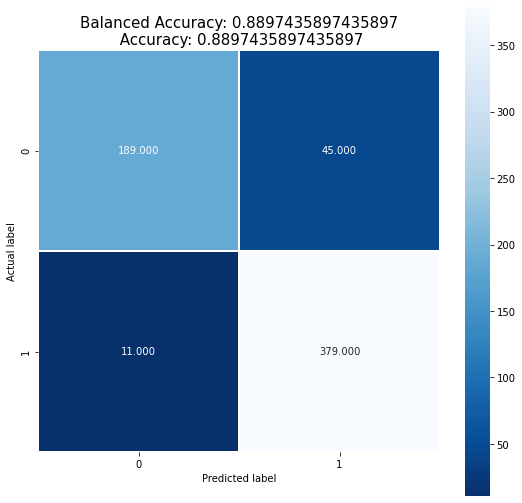

In [11]:
cnn.display_confusion_matrix(test_data_generator = test_set)